In [1]:
"1 QBM Agent - 5x3 Grid - 1 Goal - Random Starting Point"
"0.005 LR - 8 Mini Batch - 250 Warm Up"
"5 Runs - 300 Max Steps - 500 Episodes - 190-220 Reward Optimal"
"Tests how ERB influences learning"


from neptune import Session
import pandas as pd

session = Session()
project = session.get_project('tobiasmueller/qmarl')

exps_target_1_erb_1 = project.get_experiments(['QMAR-7', 'QMAR-8', 'QMAR-9', 'QMAR-10', 'QMAR-11'])
exps_target_0_erb_0 = project.get_experiments(['QMAR-30', 'QMAR-31', 'QMAR-32', 'QMAR-33', 'QMAR-34'])
exps_target_0_erb_1 = project.get_experiments(['QMAR-52', 'QMAR-53', 'QMAR-54', 'QMAR-55', 'QMAR-58'])
exps_target_1_erb_0 = project.get_experiments(['QMAR-67', 'QMAR-68', 'QMAR-69', 'QMAR-70', 'QMAR-71'])

In [2]:
import numpy as np

values_target_1_erb_1 = [exp.get_numeric_channels_values("episode_rewards")['episode_rewards']
              for exp in exps_target_1_erb_1]
values_target_0_erb_0 = [exp.get_numeric_channels_values("episode_rewards")['episode_rewards']
              for exp in exps_target_0_erb_0]
values_target_0_erb_1 = [exp.get_numeric_channels_values("episode_rewards")['episode_rewards']
              for exp in exps_target_0_erb_1]
values_target_1_erb_0 = [exp.get_numeric_channels_values("episode_rewards")['episode_rewards']
              for exp in exps_target_1_erb_0]

In [3]:
steps_target_1_erb_1 = [exp.get_numeric_channels_values("episode_steps")['episode_steps']
              for exp in exps_target_1_erb_1]
steps_target_0_erb_0 = [exp.get_numeric_channels_values("episode_steps")['episode_steps']
              for exp in exps_target_0_erb_0]
steps_target_0_erb_1 = [exp.get_numeric_channels_values("episode_steps")['episode_steps']
              for exp in exps_target_0_erb_1]
steps_target_1_erb_0 = [exp.get_numeric_channels_values("episode_steps")['episode_steps']
              for exp in exps_target_1_erb_0]

In [4]:
import matplotlib.pyplot as plt

mu1 = np.mean(values_target_0_erb_0, axis=0)
mu2 = np.mean(values_target_0_erb_1, axis=0)
mu3 = np.mean(values_target_1_erb_0, axis=0)
mu4 = np.mean(values_target_1_erb_1, axis=0)

t = np.arange(500)


plt.plot(mu1, color='blue', label="Traditional", linewidth=0.5)
plt.plot(mu2, color='black', label="ERB", linewidth=0.5)
plt.plot(mu3, color='green', label="Target", linewidth=0.5)
plt.plot(mu4, color='red', label="Target + ERB", linewidth=0.5)

plt.fill_between(t, np.max(values_target_0_erb_0, axis=0), np.min(values_target_0_erb_0, axis=0), facecolor='blue', alpha=0.25)
plt.fill_between(t, np.max(values_target_0_erb_1, axis=0), np.min(values_target_0_erb_1, axis=0), facecolor='black', alpha=0.25)
plt.fill_between(t, np.max(values_target_1_erb_0, axis=0), np.min(values_target_1_erb_0, axis=0), facecolor='green', alpha=0.25)
plt.fill_between(t, np.max(values_target_1_erb_1, axis=0), np.min(values_target_1_erb_1, axis=0), facecolor='red', alpha=0.25)

plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.savefig('5x3_reward.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 1 Axes>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


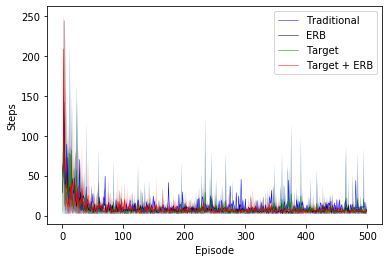

In [5]:
mu1 = np.mean(steps_target_0_erb_0, axis=0)
mu2 = np.mean(steps_target_0_erb_1, axis=0)
mu3 = np.mean(steps_target_1_erb_0, axis=0)
mu4 = np.mean(steps_target_1_erb_1, axis=0)

t = np.arange(500)


plt.plot(mu1, color='blue', label="Traditional", linewidth=0.5)
plt.plot(mu2, color='black', label="ERB", linewidth=0.5)
plt.plot(mu3, color='green', label="Target", linewidth=0.5)
plt.plot(mu4, color='red', label="Target + ERB", linewidth=0.5)

plt.fill_between(t, np.max(steps_target_1_erb_0, axis=0), np.min(steps_target_0_erb_0, axis=0), facecolor='blue', alpha=0.25)
plt.fill_between(t, np.max(steps_target_0_erb_1, axis=0), np.min(steps_target_0_erb_1, axis=0), facecolor='black', alpha=0.25)
plt.fill_between(t, np.max(steps_target_1_erb_0, axis=0), np.min(steps_target_1_erb_0, axis=0), facecolor='green', alpha=0.25)
plt.fill_between(t, np.max(steps_target_1_erb_1, axis=0), np.min(steps_target_1_erb_1, axis=0), facecolor='red', alpha=0.25)

plt.xlabel("Episode")
plt.ylabel("Steps")
plt.legend()
plt.savefig('5x3_steps.eps', format='eps')
plt.show()

/Users/tobiasmuller/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; p

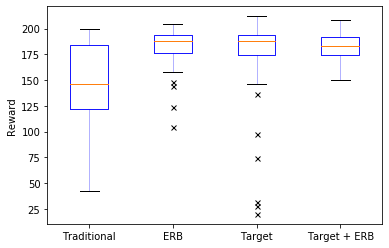

In [6]:
fig, ax = plt.subplots()

ticks = ["Traditional", "ERB", "Target", "Target + ERB"]

line_props = dict(color="blue", alpha=0.3)
bbox_props = dict(color="blue", alpha=0.9)
flier_props = dict(color="blue", marker="x", markersize=5)

# Create a figure instance
a = [np.average(values_target_0_erb_0, axis=0)[450:]]
a = np.delete(a, np.argmin(a))

erb_0_target_0 = a
erb_1_target_1 = [np.average(values_target_1_erb_1, axis=0)[450:]]
erb_0_target_1 = [np.average(values_target_1_erb_0, axis=0)[450:]]
erb_1_target_0 = [np.average(values_target_0_erb_1, axis=0)[450:]]

data = [erb_0_target_0, erb_1_target_0[0], erb_0_target_1[0], erb_1_target_1[0]]

bp = ax.boxplot(data, showfliers=True, whiskerprops=line_props,
                boxprops=bbox_props, flierprops=flier_props)

plt.ylabel('Reward')
ax.set_xticklabels(ticks)
plt.savefig('5x3_boxplot.eps', format='eps')
plt.show()